# 04_visualize_anchors

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(wh_in_mobilenet):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]

    anchor_path = dataset_disk + 'generated_anchors_mobilenet/'
    for i in range(1, 11):
        cv2.namedWindow('%d_anchors' % int(i))
        cv2.moveWindow('%d_anchors' % int(i), 100, 100)
        blank_image = np.zeros((wh_in_mobilenet[0], wh_in_mobilenet[1], 3), np.uint8)
        blank_image += 255
        anchor_txt = anchor_path + 'anchors_%d.txt' % int(i)
        anchors = []
        with open(anchor_txt, 'r') as f:
            for i, line in enumerate(f):
                line = line.rstrip('\n')
                anchor = line.split(', ')
                anchors.append(anchor)

        output_img = os.path.join(anchor_txt).replace('.txt', '.png')
        stride_h = 10
        stride_w = 3
        for i in range(len(anchors)):
            (w, h) = map(float, anchors[i])

            w = int(w * stride)
            h = int(h * stride)
            print(w, h)

            # make sure starting coordinates of anchors do not overlap each other
            offset_x = 10 + i * stride_w
            offset_y = 10 + i * stride_h

            cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i])

#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
            cv2.waitKey(1000)
            cv2.imwrite(output_img, blank_image)
        plt.imshow(blank_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

183 134


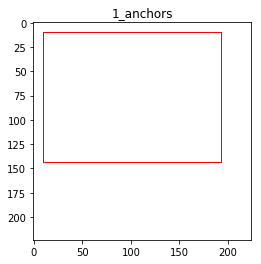


96 78
200 144


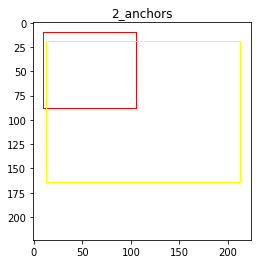


75 63
163 112
208 154


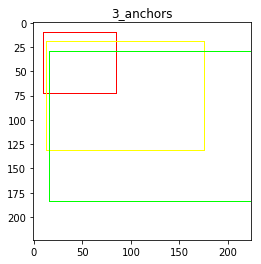


61 52
114 99
185 115
208 156


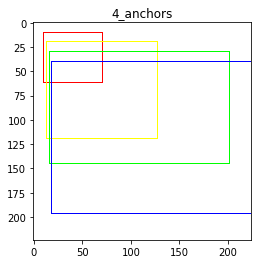


61 51
112 95
161 140
198 106
213 156


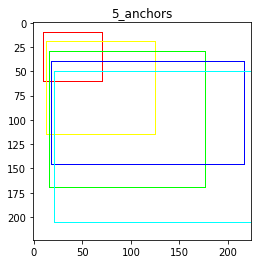


59 47
106 89
145 127
179 150
202 106
216 157


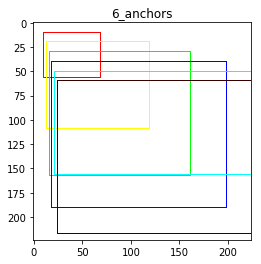


48 34
77 69
121 96
152 132
185 153
203 107
218 157


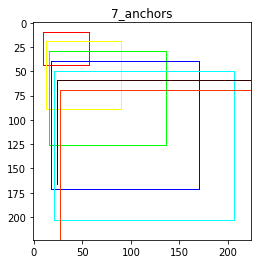


48 34
77 69
114 100
152 131
183 153
191 92
211 124
217 160


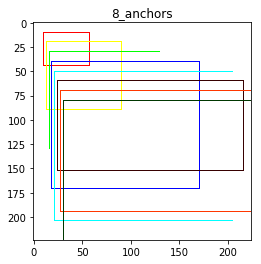


56 43
90 85
129 108
156 139
183 84
189 156
203 112
216 136
219 163


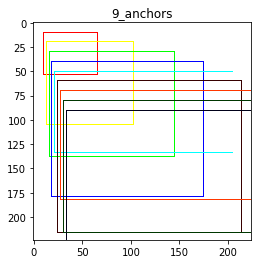


48 34
77 69
113 100
142 145
164 120
178 83
183 153
213 108
215 137
217 163


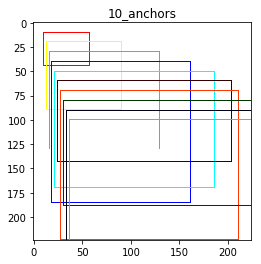


Done!


In [3]:
wn_in_mobilenet = [224, 224]
dataset_disk = '/Volumes/JS/UECFOOD100_JS/'
visualize(wn_in_mobilenet)